In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 500)
import tabula
from pandasql import sqldf
import math
from scipy.stats import chi2
from scipy import stats
from matplotlib import pyplot as plt

In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [3]:
credits = pd.read_csv(r"C:\Users\edwar\Desktop\Melbourne\semester1\elements_of_data_processing\assignment2\credits.csv")
titles = pd.read_csv(r"C:\Users\edwar\Desktop\Melbourne\semester1\elements_of_data_processing\assignment2\titles.csv")
movie_data = titles.copy()
person_data = credits.copy()

# small preprocessing on data
movie_data = movie_data.rename(columns = {'id':'movie_id'}).drop(['production_countries', 'seasons', 'runtime', 'release_year'], axis = 1)
person_data = person_data.rename(columns = {'id':'movie_id'}).drop(['character'], axis = 1)
movie_data['description'] = movie_data['description'].str.replace(r'[\".,!?():]', '',regex = True).str.replace(r'[\d+]', '', regex = True)
movie_data['genres'] = movie_data['genres'].apply(lambda x : eval(x))

### text processing

In [4]:
stop_words = stopwords.words('english')
descriptions = list(movie_data['description'])
descriptions_v1 = []

# tokenization, lemmatization, and remove stopwords
for description in descriptions:
    try:
        descrp_tokenize = nltk.word_tokenize(description)
        
        lemmatizer = WordNetLemmatizer()
        lemma_descrp = [lemmatizer.lemmatize(word.lower()) for word in descrp_tokenize]
        
        removed_descrp = [word for word in lemma_descrp if word not in stop_words]
        descriptions_v1.append(removed_descrp)
        
    # Just want to prevent error if we encounter the null description.
    except:
        descriptions_v1.append(['nulll'])

In [5]:
movie_data['description_v1'] = descriptions_v1
movie_data_v1 = movie_data.drop(['description'], axis = 1)

In [7]:
# count words freq
special_words = ['’', "'s"]
word_dicts = {}
for words in descriptions_v1:
    for word in words:
        if word in special_words:
            continue
        if word_dicts.get(word) == None:
            word_dicts[word] = 1
        else:
            word_dicts[word] += 1
words_ser = pd.Series(word_dicts)
withhold_words = list(words_ser[words_ser > 150].index)  # 95 words withheld, set criteria with 150

### OneHotEncoding

for words

In [9]:
# create new columns based on withhold_words selected by frequency of words
for col in withhold_words:
    movie_data_v1[col] = [0 for i in range(len(movie_data_v1))]

# finding whether the word is in description
for i in range(len(movie_data_v1)):
    word_lists = movie_data_v1.iloc[i]['description_v1']
    for word in word_lists:
        if word in withhold_words:
            movie_data_v1.at[i, word] = 1

### figures made in this process

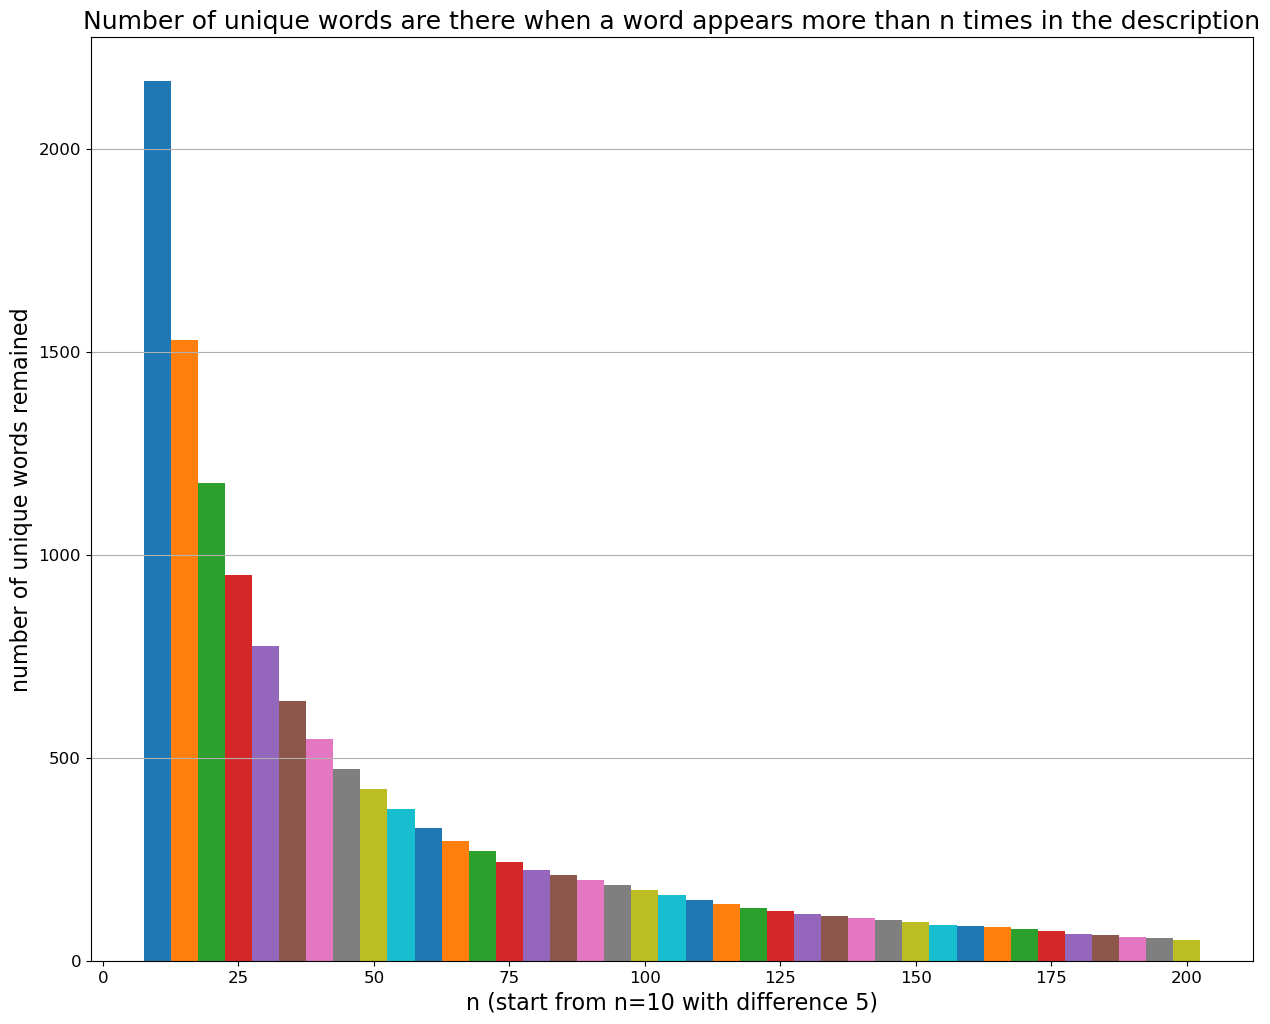

In [79]:
plt.figure(figsize = (15, 12))
plt.grid(which = 'major', axis = 'y', gapcolor = 'black')
plt.title('Number of unique words are there when a word appears more than n times in the description', fontsize = 18)

for i in range(10, 201, 5):
    plt.bar(x = i, height = len(words_ser[words_ser > i]), width = 5)
plt.xlabel('n (start from n=10 with difference 5)', fontsize = 16)
plt.ylabel('number of unique words remained', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()
# plt.savefig('fig1.jpg', format = 'jpg', dpi = 300)
# plt.close()